Что такое аномалия / выброс?

В статистике, выбросы - это точки данных, которые не принадлежат определенной популяции. Это ненормальное наблюдение, которое находится далеко от других ценностей. Выделение - это наблюдение, которое отличается от хорошо структурированных данных.

Например, вы можете ясно увидеть выбросы в этом списке: [20,24,22,19,29,18,4300, 30,18]

Это легко идентифицировать, когда наблюдения представляют собой просто набор чисел, и он одномерный, но когда у вас есть тысячи наблюдений или многомерных измерений, вам понадобятся более умные способы обнаружения этих значений. Это то, что эта статья будет освещать.


Почему мы заботимся об аномалиях?
Обнаружение выбросов или аномалий является одной из основных проблем интеллектуального анализа данных. Появляющееся расширение и продолжающийся рост данных и распространение устройств IoT заставляют нас переосмыслить подход к аномалиям и варианты использования, которые могут быть построены с учетом этих аномалий.

Теперь у нас есть умные часы и браслеты, которые могут определять сердцебиение каждые несколько минут. Обнаружение аномалий в данных сердцебиения может помочь в прогнозировании сердечных заболеваний. Аномалии в схемах движения могут помочь в прогнозировании аварий. Его также можно использовать для выявления узких мест в сетевой инфраструктуре и трафика между серверами. Следовательно, варианты использования и решения, основанные на обнаружении аномалий, безграничны.

Еще одна причина, по которой нам необходимо обнаруживать аномалии, заключается в том, что при подготовке наборов данных для моделей машинного обучения действительно важно обнаружить все выбросы и либо избавиться от них, либо проанализировать их, чтобы понять, почему они были у вас в первую очередь.

Теперь давайте рассмотрим 5 распространенных способов обнаружения аномалий, начиная с самого простого.



Метод 1 - Стандартное отклонение:
В статистике, если распределение данных приблизительно нормальное, то около 68% значений данных находятся в пределах одного стандартного отклонения от среднего, а около 95% находятся в пределах двух стандартных отклонений, иоколо 99,7%лежат в пределах трех стандартных отклонений



Поэтому, если у вас есть какая-либо точка данных, которая более чем в 3 раза превышает стандартное отклонение, то эти точки, скорее всего, будут аномальными или выбросами.

Давайте посмотрим код.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
random.seed(1)
anomalies = []

# умножьте и сложите случайные числа, чтобы получить некоторые реальные значения
data = np.random.randn(50000)  * 20 + 20



In [3]:
# Функция обнаружения выбросов на одномерных наборах данных.

def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

-39.88753495920754


[83.64632039996252,
 -45.72701029813146,
 -43.44358190489408,
 87.46164236295655,
 84.71455203299102,
 90.0040560540636,
 -41.014474842730735,
 83.0624579684502,
 83.43710646381066,
 80.53029417565693,
 -45.56445947802649,
 87.01291238776568,
 -43.15516830228174,
 81.17687827166378,
 -46.445589130152015,
 83.28160575132235,
 -42.50337400523854,
 -53.752272042842364,
 -40.093323733861766,
 81.14202154150092,
 86.83078275439138,
 82.16254494792821,
 -46.63477332702806,
 -42.02995741791513,
 84.04608579486907,
 81.94341554577052,
 -49.83869863181613,
 -42.42065293858478,
 80.12862409465846,
 86.80088352322555,
 -43.87170596541953,
 -43.316134563401434,
 82.05176793938878,
 85.74658725667098,
 -41.534261859153865,
 -47.09749554468107,
 -45.50010733769503,
 -42.25838548303257,
 81.07079436818114,
 81.97324591302603,
 89.30435800507605,
 -43.12047246844875,
 93.18991835564606,
 -46.15414799668572,
 86.3364276246582,
 -44.61861572679038,
 -67.77615139456114,
 -40.2657000379604,
 -41.504946443

Выход этого кода представляет собой список значений выше 80 и ниже -40. Обратите внимание, что набор данных, который я передаю, является одномерным набором данных. Теперь давайте рассмотрим более продвинутые методы для многомерных наборов данных.

Графики представляют собой графическое изображение числовых данных через их квантили. Это очень простой, но эффективный способ визуализации выбросов. Думайте о нижнем и верхнем усиках как о границах распределения данных. Любые точки данных, которые показывают выше или ниже усов, могут считаться выбросами или аномальными. Вот код для построения прямоугольного графика:

<AxesSubplot:>

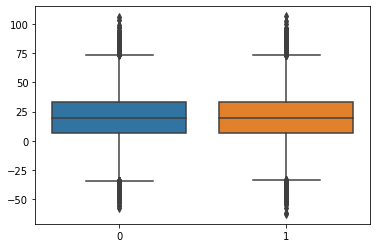

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
random_data = np.random.randn(50000,2)  * 20 + 20

sns.boxplot(data=random_data)

Приведенный выше код отображает график ниже. Как вы можете видеть, он считает все, что выше 75 или ниже ~ -35, как выброс. Результаты очень близки к методу 1 выше.



Метод 3 - Кластеризация DBScan:
DBScan - это алгоритм кластеризации, который использует кластерные данные в группы. Он также используется в качестве метода обнаружения аномалий на основе плотности как с одиночными, так и с многомерными данными. Другие алгоритмы кластеризации, такие как k-средних и иерархическая кластеризация, также могут быть использованы для обнаружения выбросов. В этом случае я покажу вам пример использования DBScan, но прежде чем мы начнем, давайте рассмотрим некоторые важные концепции. DBScan имеет три важных понятия:

Основные пункты:Чтобы понять концепцию ключевых точек, нам нужно посетить некоторые гиперпараметры, используемые для определения задания DBScan. Первый гиперпараметр (HP)min_samples.Это просто минимальное количество базовых точек, необходимых для формирования кластера.,Второй важный HPEPS. прибыль на акциюмаксимальное расстояние между двумя выборками для них, которые должны рассматриваться как в одном кластере
Пограничные пунктынаходятся в том же кластере, что и основные точки, но гораздо дальше от центра кластера.

Источник:https://stackoverflow.com/questions/34394641/dbscan-clustering-what-happens-when-border-point-of-one-cluster-is-considered
Все остальное называетсяШумовые очки,это точки данных, которые не принадлежат ни одному кластеру. Они могут быть аномальными или не аномальными и требуют дальнейшего изучения. Теперь давайте посмотрим код.

In [5]:
from sklearn.cluster import DBSCAN
random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

99

Вывод вышеуказанного кода 99.Это общее количество шумных точек. SKLearn помечает шумные точки как (-1). Недостатком этого метода является то, что чем выше размер, тем менее точным он становится. Вы также должны сделать несколько предположений, таких как оценка правильного значения дляEPS Wкоторый может быть сложным.

Метод 4 - Изоляция леса:
Isolation Forest - это алгоритм обучения без присмотра, который принадлежит к семейству деревьев решений ансамбля. Этот подход отличается от всех предыдущих методов. Все предыдущие пытались найти нормальную область данных, а затем идентифицировали что-либо за пределами этой определенной области как отклонение или аномальность.

Этот метод работает по-другому. Он явно выделяет аномалии вместо того, чтобы профилировать и строить нормальные точки и области, назначая оценку каждой точке данных. Он использует тот факт, что аномалии являются точками данных меньшинства и что они имеют значения атрибутов, которые сильно отличаются от значений в обычных случаях. Этот алгоритм отлично работает с наборами данных очень большого размера, и он оказался очень эффективным способом обнаружения аномалий. Поскольку в этой статье основное внимание уделяется реализации, а не ноу-хау, я не буду подробно останавливаться на том, как работает алгоритм. Тем не менее, полная информация о том, как это работает, рассматривается в этомбумага,

Теперь давайте рассмотрим код:

In [6]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(random_data)
preds

c:\users\evgen\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


array([-1,  1, -1, ...,  1,  1,  1])

Этот код выведет прогнозы для каждой точки данных в массиве. Если результат равен -1, это означает, что эта конкретная точка данных является выбросом. Если результат равен 1, то это означает, что точка данных не является выбросом

Метод 5 - Устойчивый лес случайных рубок:
Алгоритм Random Cut Forest (RCF) - это неконтролируемый алгоритм Amazon для обнаружения аномалий. Это работает, связывая оценку аномалии также. Низкие значения указывают на то, что точка данных считается «нормальной». Высокие значения указывают на наличие аномалии в данных. Определения «низкий» и «высокий» зависят от приложения, но общепринятая практика предполагает, что оценки, превышающие три стандартных отклонения от среднего значения, считаются аномальными. Детали алгоритма можно найти в этомбумага,

Самое замечательное в этом алгоритме то, что он работает с данными очень большого размера. Он также может работать с потоковыми данными в режиме реального времени (встроенными в AWS Kinesis Analytics), а также с автономными данными.



Вывод:
Мы живем в мире, где данные увеличиваются с каждой секундой. Значение данных может уменьшаться со временем, если не используется должным образом. Поиск аномалий в режиме онлайн в потоке или в автономном режиме в наборе данных имеет решающее значение для выявления проблем в бизнесе или создания упреждающего решения для потенциального обнаружения проблемы до ее возникновения или даже на этапе анализа предварительных данных (EDA) для подготовки набора данных для ML , Я надеюсь, что вы найдете эту статью полезной, дайте мне знать, что вы думаете в разделе комментариев ниже.